# Capstone Project - How to choose a place to start a Psychology Clinic
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction

 _Created by_ Vicente Carvalho for Coursera Capstone purposes.

Almost every business depends on location. At first, the location has an immediate effect on fixed costs and it can also be very important for variable earnings. In this problem, it will be chosen as the best location for a Psychology Clinic. The main criteria adopted are the relation between some variables such as the number of banks, hospitals, and the number of results of 'psy' results in the Foursquare database. Also some analysis will be made based on property evaluation of Rent Cost per SqFt and Market Value.

### Customer

Customer C is a psychologist who is also owner of one clinic of psychology in New York. C wants to know what areas of New York are good to install your clinics. Right now C has only one clinic in Manhattan but C wants to open new clinics in other regions too.

### Business Problem

C intends to scale your business and also to dilute some fixed costs by using the same client target for all your clinics in New York.

C intends to use similar as possible furniture, paints and customer psychology challengers. C believes that beyond one-by-one therapy, group therapy is also a great tool to providing to your clients better health and quality of life, so it is interesting to deal with clients of similar backgrounds and interests.

In C experience as clinical psychology, there is a strong correlation between customer psychology profile and house/work neighborhood area. It's known by the client experience that Manhattan is a great place but frequently over too overpriced. So, the client wants to know other areas that are similar to Manhattan that should be also investigated.

# Methodology: Problem Solution Framework

C needs customer clusterization. As C is pretty sure about psychology profile and neighborhood, the first approach is definitely to try cluster neighbors in New York. 

It's necessary more information about his actual clinic in Manhattan: 
 - C said in his actual clinic there are a lot of psychologist clinics, hospitals, and banks: it should be examined as evidence of good places;
 - it is supposed that the correlation is strong between place and psychological profile;
 - C wants to know which are the potencial neighborhoods; and
 - C wants a recommendation of potencial property with cost analysis.


### Data Requeriments and Approach

It will be used data from Foursquare API and New York Open Data of all properties. The steps admitted to solving the clusterization are:

 - Read New York Json file;
 - Add Latitude and Longitude information by Borough and Neighborhood;
 - Data Extract by Foursquare's API;
 - Find data about New York Properties;
 - Analyze correlation between Market Value and Rent Cost; and
 - Generate a list of Properties Recommendation.

# Analysis: Problem Solving

At first, k-means will be used to cluster regions of New York based on venues amount, because it has a strong relation with psychology profile as suggested by C. To perform that it will be observed a strict radius to minimize the incidence of the same results for different searches. So, k-means will clusterize psychology profile of potencial clients in New York.

After clusterization, the main cluster will be evaluated based on Rent Cost by Square Feet and Market Value. Properties with great Market Value is good, because it usually means better infrastructure, better location and more value companies arounded. Nevertheless, Market Value usually pulls Rent Cost by Square Feet which is bad.

So, Properties with good clients cluster, high market value and low rent cost is better. At the end it is provided a list of properties recommendation in decedent order for C.

## Data Extract Foursquare

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
import json
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'ZZUKG2R2MDGSCP30TS4XINPAP4Y4PMBLU1DO1TNGFFPCNTZR' # your Foursquare ID
CLIENT_SECRET = 'KTAN34ECK3NKIB2LVQD2REJ5IEF4CG1YZOOEA5A3RIXSMMIT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZZUKG2R2MDGSCP30TS4XINPAP4Y4PMBLU1DO1TNGFFPCNTZR
CLIENT_SECRET:KTAN34ECK3NKIB2LVQD2REJ5IEF4CG1YZOOEA5A3RIXSMMIT


### Neighborhoods in New York

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


## Create Map of New York

In [9]:
!conda install -c conda-forge geopy --yes
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

done
- 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



In [10]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [87]:
lat = 40.7127281
lng = -74.0060152

In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[lat, lng], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Connecting Foursquare API for Venue Information 

In [13]:
neighborhoods['Psy'] = 0
neighborhoods['Hospital'] = 0
neighborhoods['Bank'] = 0
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude,Psy,Hospital,Bank
0,Bronx,Wakefield,40.894705,-73.847201,0,0,0
1,Bronx,Co-op City,40.874294,-73.829939,0,0,0
2,Bronx,Eastchester,40.887556,-73.827806,0,0,0
3,Bronx,Fieldston,40.895437,-73.905643,0,0,0
4,Bronx,Riverdale,40.890834,-73.912585,0,0,0


In [16]:
len(neighborhoods['Psy'])

306

In [17]:
columns = ['Psy','Hospital','Bank']
final = len(neighborhoods['Psy'])
radius = 500
LIMIT = 100
for i in range(0, final):
    lat = neighborhoods.at[i,'Latitude']
    lng = neighborhoods.at[i,'Longitude']
    name = neighborhoods.at[i,'Neighborhood']
        # create the API request URL
    url = []
    url.append('https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, 'psy', radius, LIMIT))
    url.append('https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, 'hospital', radius, LIMIT))
    url.append('https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, 'bank', radius, LIMIT))
        
    # make the GET request
    # results = requests.get(url).json()["response"]['groups'][0]['items']
    for k in range(0,3):
        results = requests.get(url[k]).json()
        print(results)
        if ((results['response']['venues'] != []) and ('warning' not in results['response'].keys())):
            # assign relevant part of JSON to venues
            venues = results['response']['venues']
            # tranform venues into a dataframe
            dataframe = json_normalize(venues)
            neighborhoods.at[i,columns[k]] = dataframe.shape[0]
    print('Caso da linha:',i)
        #else:
            # No response from Foursquare API, this code is not needed by definition of neighborhoods
            # neighborhoods.loc[i,k] = 0 

e', 'pluralName': 'Financial or Legal Services', 'shortName': 'Financial / Legal', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1585314001', 'hasPerk': False}]}}
Caso da linha: 297
{'meta': {'code': 200, 'requestId': '5e7df88469babe001b3166fe'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '5e7df7a3bae9a2001b3220f9'}, 'response': {'venues': [{'id': '4ddfb35d7d8b04e50262ce99', 'name': 'Tri-Boro Animal Hospital', 'location': {'address': '3004 Lurting Ave', 'lat': 40.870065000000004, 'lng': -73.856412, 'labeledLatLngs': [{'label': 'display', 'lat': 40.870065000000004, 'lng': -73.856412}], 'distance': 535, 'postalCode': '10469', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3004 Lurting Ave', 'Bronx, NY 10469', 'United States']}, 'categories': [{'id': '4d954af4a243a5684765b473', 'name': 'Veterinarian', 'pluralName': 'Veterinarians', 'sho

In [19]:
neighborhoods.to_csv('FoursquareAPI.csv')
neighborhoods

,Borough,Neighborhood,Latitude,Longitude,Psy,Hospital,Bank
0,Bronx,Wakefield,40.894705,-73.847201,0,0,1
1,Bronx,Co-op City,40.874294,-73.829939,0,0,5
2,Bronx,Eastchester,40.887556,-73.827806,0,0,0
3,Bronx,Fieldston,40.895437,-73.905643,0,0,1
4,Bronx,Riverdale,40.890834,-73.912585,0,1,5
...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,1,1,7
302,Queens,Hammels,40.587338,-73.805530,0,0,0
303,Queens,Bayswater,40.611322,-73.765968,0,0,0
304,Queens,Queensbridge,40.756091,-73.945631,0,0,0


In [37]:
df_venues = pd.DataFrame()

In [4]:
df_venues = pd.read_csv('FoursquareAPI.csv')
df_venues.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_venues.head()

,Borough,Neighborhood,Latitude,Longitude,Psy,Hospital,Bank
0,Bronx,Wakefield,40.894705,-73.847201,0,0,1
1,Bronx,Co-op City,40.874294,-73.829939,0,0,5
2,Bronx,Eastchester,40.887556,-73.827806,0,0,0
3,Bronx,Fieldston,40.895437,-73.905643,0,0,1
4,Bronx,Riverdale,40.890834,-73.912585,0,1,5


## Clustering Regions

The clusterization are using three independent variables, it's highly desirable to seggregate all cube vertices (8). If we assume each axis are one variable, the cube represents the normalized variables. So, it is interesting use 8 clusters to analyze all cases separatelly. The image bellow illustrate a cube 2x2 where each vertice is a unique block. 

<img src ="cube.jpg" width= "400" align="center"/>

In [13]:
from sklearn.preprocessing import StandardScaler

X = df_venues[['Psy','Hospital','Bank']]
cluster_dataset = StandardScaler().fit_transform(X)

In [22]:
scaler_axis = pd.DataFrame(cluster_dataset,columns=['Psy','Hospital','Bank'])
scaler_axis.head()

,Psy,Hospital,Bank
0,-0.330031,-0.460015,-0.503746
1,-0.330031,-0.460015,-0.077633
2,-0.330031,-0.460015,-0.610274
3,-0.330031,-0.460015,-0.503746
4,-0.330031,-0.231129,-0.077633


In [31]:
from sklearn.cluster import KMeans

num_clusters = 8

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
df_venues['Client_Cluster'] = labels
scaler_axis['Client_Cluster'] = labels
df_venues

,Borough,Neighborhood,Latitude,Longitude,Psy,Hospital,Bank,Client_Cluster
0,Bronx,Wakefield,40.894705,-73.847201,0,0,1,0
1,Bronx,Co-op City,40.874294,-73.829939,0,0,5,0
2,Bronx,Eastchester,40.887556,-73.827806,0,0,0,0
3,Bronx,Fieldston,40.895437,-73.905643,0,0,1,0
4,Bronx,Riverdale,40.890834,-73.912585,0,1,5,5
...,...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,1,1,7,5
302,Queens,Hammels,40.587338,-73.805530,0,0,0,0
303,Queens,Bayswater,40.611322,-73.765968,0,0,0,0
304,Queens,Queensbridge,40.756091,-73.945631,0,0,0,0


Let's evaluate if 8 is a good number of clusters..

Text(0, 0.5, 'Sum of Squared Distance')

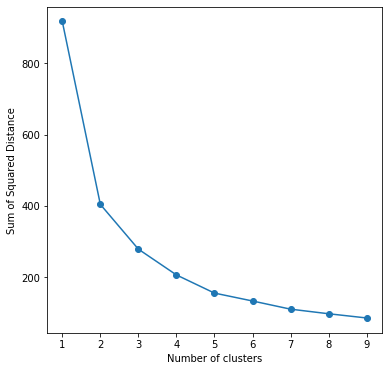

In [29]:
# Run the Kmeans algorithm and get the index of data points clusters
import matplotlib.pyplot as plt

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(cluster_dataset)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Sum of Squared Distance')

Sounds that 6 is a good number of clusters...

In [32]:
num_clusters = 6

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
df_venues['Client_Cluster'] = labels
scaler_axis['Client_Cluster'] = labels
df_venues

,Borough,Neighborhood,Latitude,Longitude,Psy,Hospital,Bank,Client_Cluster
0,Bronx,Wakefield,40.894705,-73.847201,0,0,1,0
1,Bronx,Co-op City,40.874294,-73.829939,0,0,5,0
2,Bronx,Eastchester,40.887556,-73.827806,0,0,0,0
3,Bronx,Fieldston,40.895437,-73.905643,0,0,1,0
4,Bronx,Riverdale,40.890834,-73.912585,0,1,5,0
...,...,...,...,...,...,...,...,...
301,Manhattan,Hudson Yards,40.756658,-74.000111,1,1,7,0
302,Queens,Hammels,40.587338,-73.805530,0,0,0,0
303,Queens,Bayswater,40.611322,-73.765968,0,0,0,0
304,Queens,Queensbridge,40.756091,-73.945631,0,0,0,0


First let's check if our client C's guess is right about psychology profile and amount of Banks and Hospital. If is true, it is hoped that others psychologist have the same guess which leads to a higher amount of clinics in areas with a great amount of banks and hospitals. So, the correlation between those variables must be significant.

In [38]:
df_venues[['Psy','Hospital','Bank']].corr()

,Psy,Hospital,Bank
Psy,1.000000,0.619385,0.744304
Hospital,0.619385,1.000000,0.576247
Bank,0.744304,0.576247,1.000000


UAU! Sounds that C was right about it...

Let's visualize that data and clusters... 

In [10]:
!conda install -c plotly plotly=4.5.4 --yes

|
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



In [40]:
import matplotlib.pyplot as plt
import plotly.express as px
fig1 = px.scatter_3d(df_venues, x='Hospital', y='Bank', z='Psy',color='Client_Cluster')
fig1.show()

Awesome! Sounds that amount of Banks have higher influence in the amount of Psy Clinics than hospitals.

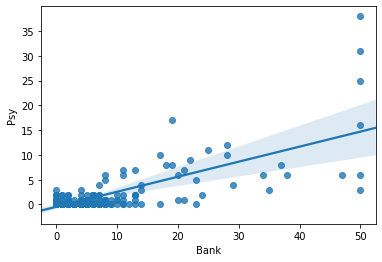

In [35]:
import seaborn as sns
ax = sns.regplot(x="Bank", y="Psy", data=df_venues)

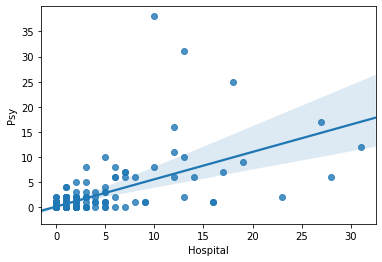

In [42]:
ax = sns.regplot(x="Hospital", y="Psy", data=df_venues)

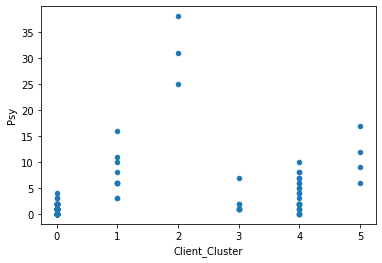

In [47]:
ax = df_venues.plot(kind = 'scatter', x="Client_Cluster", y="Psy")

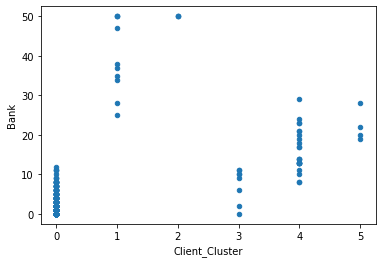

In [57]:
ax = df_venues.plot(kind = 'scatter', x="Client_Cluster", y="Bank")

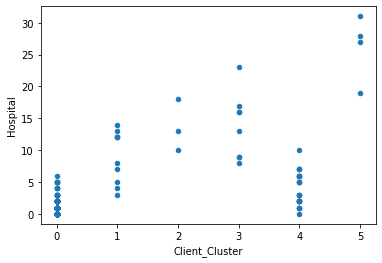

In [58]:
ax = df_venues.plot(kind = 'scatter', x="Client_Cluster", y="Hospital")

Looks like Clusters 2 is the most interesting, but there are a lot concorrents. Cluster 1 looks very good and there are not a lot concorrents...

Let's compare clusters 2, 1 and 5 using Bubble Charts where the size of the bubbles are the amount of Psy results.

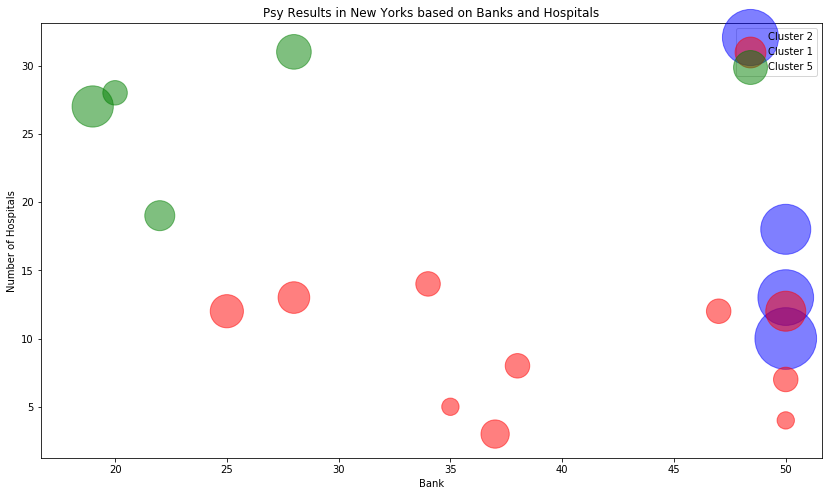

In [83]:
cluster2 = df_venues[df_venues['Client_Cluster']== 2]
cluster1 = df_venues[df_venues['Client_Cluster']== 1]
cluster5 = df_venues[df_venues['Client_Cluster']== 5]
norm = (df_venues['Psy']-df_venues['Psy'].min())/(df_venues['Psy'].max()-df_venues['Psy'].min())
ax0 = cluster2.plot(kind = 'scatter', x="Bank", y="Hospital",figsize=(14, 8),alpha=0.5,            
                    color='Blue',
                    s=cluster2['Psy']* 100 + 1,  # pass in weights 
                   )
norm1 = (cluster1['Psy']-cluster1['Psy'].min())/(cluster1['Psy'].max()-cluster1['Psy'].min())
ax1 = cluster1.plot(kind = 'scatter', x="Bank", y="Hospital",figsize=(14, 8),alpha=0.5,            
                    color='Red',
                    s=cluster1['Psy']* 100 + 1,  # pass in weights 
                    ax = ax0
                   )
norm5 = (cluster5['Psy']-cluster5['Psy'].min())/(cluster5['Psy'].max()-cluster5['Psy'].min())
ax2 = cluster5.plot(kind = 'scatter', x="Bank", y="Hospital",figsize=(14, 8),alpha=0.5,            
                    color='Green',
                    s=cluster5['Psy']* 100 + 1,  # pass in weights 
                    ax = ax0
                   )
ax0.set_ylabel('Number of Hospitals')
ax0.set_title('Psy Results in New Yorks based on Banks and Hospitals')
ax0.legend(['Cluster 2', 'Cluster 1','Cluster 5'], loc='upper right')

Let's plot the cluster in map to check where those three cluster are...

In [88]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[lat, lng], zoom_start=10)
cores = ['LightSalmon','Red','Blue','LightBlue','LightGreen','Green']
# add markers to map
for lat, lng, borough, neighborhood, cluster in zip(df_venues['Latitude'], df_venues['Longitude'], df_venues['Borough'], df_venues['Neighborhood'],df_venues['Client_Cluster']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color= cores[cluster],
        fill=True,
        fill_color = cores[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

UAU again! The main three cluster are in Manhattan! But the 4th desirable cluster (lightgreens) are outside... in Brooklin, Queens and Bronx.

Now... let's check how much cost properties rents in those areas...

### Rent info from Open Data New York: 

https://data.cityofnewyork.us/City-Government/DOF-Condominium-Comparable-Rental-Income-in-NYC/9ck6-2jew


As commented in Problem Definition Section, the client C wants places with a lot of Banks, Hospital and other professionals related to psychology because of his customers profile. However, it is really important evaluate economic criteria related to the locals for new psychology clinics. 

To perform the economic evaluation two criteria was used rent price and market price of the properties. Idealy there is a strong correlation between these two variables but let's examinate if there are low rent and high market price in the areas desired by the customer.

At the end let´s create a DataFrame of potencial properties to be reccomended for client C in ascend order of rent per SqFt.

In [233]:
prop = pd.read_csv('DOF_Condominium_Comparable_Rental_Income_in_NYC.csv')
prop.drop(columns = ['Condo Section','Building Classification','Distance from Condo in miles','Neighborhood 1', 'Gross Income per SqFt 1',
       'Estimated Expense 1', 'Expense per SqFt 1', 'Net Operating Income 1',
       'Full Market Value 1', 'Market Value per SqFt 1','Estimated Expense',
       'Expense per SqFt', 'Net Operating Income', 'Full Market Value','Estimated Gross Income','Gross SqFt','Boro-Block-Lot 2', 'Address 2', 'Neighborhood 2',
       'Building Classification 2', 'Total Units 2', 'Year Built 2',
       'Gross SqFt 2', 'Estimated Gross Income 2', 'Gross Income per SqFt 2',
       'Estimated Expense 2', 'Expense per SqFt 2', 'Net Operating Income 2',
       'Full Market Value 2', 'Market Value per SqFt 2',
       'Distance from Condo in miles 1', 'Boro-Block-Lot 3', 'Address 3',
       'Neighborhood 3', 'Building Classification 3', 'Total Units 3',
       'Year Built 3', 'Gross SqFt 3', 'Estimated Gross Income 3',
       'Gross Income per SqFt 3', 'Estimated Expense 3', 'Expense per SqFt 3',
       'Net Operating Income 3', 'Full Market Value 3',
       'Market Value per SqFt 3', 'Distance from Condo in miles 2',
       'Report Year','Building Classification 1', 'Total Units 1',
       'Year Built 1', 'Gross SqFt 1', 'Estimated Gross Income 1','Total Units', 'Year Built','Boro-Block-Lot 1', 'Address 1'], axis = 0, inplace = True)
prop.rename(columns = {'Boro-Block-Lot':'Borough'}, inplace = True)

Let's interpretate Gross Income per SqFt as Rent per SqFt to simply our problem.

In [234]:
prop.rename(columns = {'Gross Income per SqFt':'Rent_per_SqFt', 'Market Value per SqFt':'Value_per_SqFt'}, inplace = True)

In [235]:
for i in range(len(prop['Borough'])):
    ind = prop.at[i,'Borough'].split('-')[0]
    #print(ind)
    if ind == '1':
        prop.at[i,'Borough'] = 'Manhattan'
    elif ind == '2':
        prop.at[i,'Borough'] = 'Bronx'
    elif ind == '3':
        prop.at[i,'Borough'] = 'Brooklyn'
    elif ind == '4':
        prop.at[i,'Borough'] = 'Queens'
    elif ind == '5':
        prop.at[i,'Borough'] = 'Staten Island'

In [236]:
prop['Cluster'] = 1000  # Just for initializing...
prop.head()

,Borough,Address,Neighborhood,Rent_per_SqFt,Value_per_SqFt,Cluster
0,Manhattan,1 COENTIES SLIP,FINANCIAL,33.32,196.05,1000
1,Manhattan,39 WHITEHALL STREET,FINANCIAL,53.97,309.63,1000
2,Manhattan,17 BATTERY PLACE,FINANCIAL,29.97,168.55,1000
3,Manhattan,20 WEST STREET,FINANCIAL,35.92,187.99,1000
4,Manhattan,377 RECTOR PLACE,TRIBECA,32.22,203.02,1000


In [237]:
prop['Borough'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

### Analysis of Cluster 2,1,5 and 4

In [238]:
df_venues.head()

,Borough,Neighborhood,Latitude,Longitude,Psy,Hospital,Bank,Client_Cluster
0,Bronx,Wakefield,40.894705,-73.847201,0,0,1,0
1,Bronx,Co-op City,40.874294,-73.829939,0,0,5,0
2,Bronx,Eastchester,40.887556,-73.827806,0,0,0,0
3,Bronx,Fieldston,40.895437,-73.905643,0,0,1,0
4,Bronx,Riverdale,40.890834,-73.912585,0,1,5,0


Several cases was not find in Json file. So let's check each one to find the correct classification In fact, Southbridge is 'Financial District' in our Json file. So, let's change it.

In [239]:
prop.at[prop['Neighborhood'] == 'SOUTHBRIDGE','Neighborhood'] = 'Financial District'
prop.at[prop['Neighborhood'] == 'ALPHABET CITY','Neighborhood'] = 'Noho'
prop.at[prop['Neighborhood'] == '15TH Q QUEENS','Neighborhood'] = 'Forest Hills Garden'
prop.at[prop['Neighborhood'] == '75TH Q QUEENS','Neighborhood'] = 'Murray Hill'
prop.at[prop['Neighborhood'] == 'JAVITS CENTER','Neighborhood'] = 'Hudson Yards'
prop.at[prop['Neighborhood'] == 'FASHION','Neighborhood'] = 'Midtown South'
prop.at[prop['Neighborhood'] == '75TH Q BROOKLYN','Neighborhood'] = 'Williamsburgh'
prop.at[prop['Neighborhood'] == 'BUSH TERMINAL','Neighborhood'] = 'Sunset Park'
prop.at[prop['Neighborhood'] == '50TH Q BROOKLYN','Neighborhood'] = 'Ocean Parkway'
prop.at[prop['Neighborhood'] == 'QN04','Neighborhood'] = 'Flushing'
prop.at[prop['Neighborhood'] == 'KIPS BAY','Neighborhood'] = 'Gramercy'
prop.at[prop['Neighborhood'] == 'NAVY YARD','Neighborhood'] = 'Clinton Hill'
prop.at[prop['Neighborhood'] == '30TH Q BROOKLYN','Neighborhood'] = 'Clinton Hill'
prop.at[prop['Neighborhood'] == 'SPRING CREEK','Neighborhood'] = 'Clinton Hill'
prop.at[prop['Neighborhood'] == '5TH Q BROOKLYN','Neighborhood'] = 'Sheepshead Bay'
prop.at[prop['Neighborhood'] == 'HARLEM-CENTRAL','Neighborhood'] = 'Central Harlem'
prop.at[prop['Neighborhood'] == 'HARLEM-EAST','Neighborhood'] = 'East Harlem'
prop.at[prop['Neighborhood'] == 'HARLEM-WEST','Neighborhood'] = 'Manhattanville'
prop.at[prop['Neighborhood'] == 'HARLEM-UPPER','Neighborhood'] = 'Hamilton Heights'
prop.at[prop['Neighborhood'] == 'WYCKOFF HEIGHTS','Neighborhood'] = 'Bushwick'
prop.at[prop['Neighborhood'] == 'BRONX-UNKNOWN','Neighborhood'] = 'Parkchester'
prop.at[prop['Neighborhood'] == 'CROTONA PARK','Neighborhood'] = 'East Tremont'
prop.at[prop['Neighborhood'] == 'BATHGATE','Neighborhood'] = 'East Tremont'
prop.at[prop['Neighborhood'] == 'BRONX PARK','Neighborhood'] = 'Claremont Village'
prop.at[prop['Neighborhood'] == '2999','Neighborhood'] = 'Parkchester'

In [240]:
for i in range(0,df_venues.shape[0]):
    if df_venues.at[i,'Client_Cluster'] in [0,1,2,3,4,5]:
        neigh = df_venues.at[i,'Neighborhood'].lower()
        boro = df_venues.at[i,'Borough']
        for k in range(0,prop.shape[0]):
            prop_neigh = prop.at[k,'Neighborhood'].lower()
            if (prop_neigh in neigh) or (neigh in prop_neigh):
                prop.at[k,'Cluster'] = df_venues.at[i,'Client_Cluster']
                prop.at[k,'Neighborhood'] = df_venues.at[i,'Neighborhood']
prop.head()

,Borough,Address,Neighborhood,Rent_per_SqFt,Value_per_SqFt,Cluster
0,Manhattan,1 COENTIES SLIP,Financial District,33.32,196.05,1
1,Manhattan,39 WHITEHALL STREET,Financial District,53.97,309.63,1
2,Manhattan,17 BATTERY PLACE,Financial District,29.97,168.55,1
3,Manhattan,20 WEST STREET,Financial District,35.92,187.99,1
4,Manhattan,377 RECTOR PLACE,Tribeca,32.22,203.02,4


In [241]:
prop[prop['Cluster'] == 1000]

,Borough,Address,Neighborhood,Rent_per_SqFt,Value_per_SqFt,Cluster


Great! Every property is classified in a cluster.

Let's check properties grouped by cluster ordered Value/rent ratio.

# Results and Discussion

In [243]:
prop['Ratio'] = prop['Value_per_SqFt']/prop['Rent_per_SqFt']

Cluster 2 has the greatest perpectives of good clients since the amount of Banks and Clinics are highest. Also, there is a lot of psy clinics, so it will has a lot competition.

The list of best options addresses of Cluster 2 (higher Ratio) which means high market value and low rent proportion.

In [246]:
prop[prop['Cluster']== 2].sort_values(by = ['Ratio','Rent_per_SqFt'], ascending = False)

,Borough,Address,Neighborhood,Rent_per_SqFt,Value_per_SqFt,Cluster,Ratio
11016,Manhattan,346 EAST 49 STREET,Midtown South,37.86,301.68,2,7.968304
3461,Manhattan,40 EAST 21 STREET,Flatiron,30.53,229.38,2,7.513266
8993,Manhattan,50 CENTRAL PARK SOUTH,Midtown South,38.74,279.43,2,7.212958
8736,Manhattan,31 WEST 21 STREET,Flatiron,36.85,265.73,2,7.211126
19768,Manhattan,9 WEST 20 STREET,Flatiron,45.84,326.58,2,7.124346
...,...,...,...,...,...,...,...
14720,Manhattan,143 WEST 30 STREET,Midtown South,38.53,156.56,2,4.063327
8748,Manhattan,40 EAST 21 STREET,Flatiron,34.04,128.05,2,3.761751
14834,Manhattan,212 5 AVENUE,Flatiron,57.96,188.70,2,3.255694
950,Manhattan,346 EAST 49 STREET,Midtown South,33.66,108.61,2,3.226679


In [247]:
prop[prop['Cluster']== 2].Borough.unique()

array(['Manhattan'], dtype=object)

In [249]:
prop[prop['Cluster']== 2].Neighborhood.unique()

array(['Midtown South', 'Flatiron'], dtype=object)

Everything is in Manhattan what can not be interesting based on the fact that C has already one clinic there... But there are three different neighborhoods options.

Let´s check the second best cluster: 1

In [248]:
prop[prop['Cluster']== 1].sort_values(by = ['Ratio','Rent_per_SqFt'], ascending = False)

,Borough,Address,Neighborhood,Rent_per_SqFt,Value_per_SqFt,Cluster,Ratio
11796,Manhattan,201 MULBERRY STREET,Little Italy,56.45,406.56,1,7.202126
19993,Manhattan,311 WEST BROADWAY,Soho,48.09,340.37,1,7.077771
8335,Manhattan,150 DUANE STREET,Civic Center,34.07,240.49,1,7.058703
8336,Manhattan,104 READE STREET,Civic Center,34.07,240.49,1,7.058703
11608,Manhattan,470 BROOME STREET,Soho,79.46,553.16,1,6.961490
...,...,...,...,...,...,...,...
36,Manhattan,112 LIBERTY STREET,Financial District,28.14,97.89,1,3.478678
11809,Manhattan,66 PINE STREET,Financial District,53.86,160.74,1,2.984404
8286,Manhattan,66 PINE STREET,Financial District,48.80,109.65,1,2.246926
8573,Manhattan,487 GREENWICH STREET,Soho,32.97,NaN,1,NaN


In [250]:
prop[prop['Cluster']== 1].Borough.unique()

array(['Manhattan'], dtype=object)

In [251]:
prop[prop['Cluster']== 1].Neighborhood.unique()

array(['Financial District', 'Civic Center', 'Chinatown', 'Soho',
       'Little Italy'], dtype=object)

Everything is in Manhattan again what can not be interesting based on the fact that C has already one clinic there... But there are now five different neighborhoods options.

Let´s check the 3rd best cluster: 5

In [252]:
prop[prop['Cluster']== 5].sort_values(by = ['Ratio','Rent_per_SqFt'], ascending = False)

,Borough,Address,Neighborhood,Rent_per_SqFt,Value_per_SqFt,Cluster,Ratio
3899,Manhattan,237 EAST 88 STREET,Upper East Side,33.66,1000.00,5,29.708853
19899,Manhattan,237 EAST 88 STREET,Upper East Side,53.98,389.88,5,7.222675
17317,Manhattan,237 EAST 88 STREET,Upper East Side,54.74,392.56,5,7.171355
9180,Manhattan,237 EAST 88 STREET,Upper East Side,36.77,253.84,5,6.903454
20188,Manhattan,520 PARK AVENUE,Upper East Side,94.42,645.74,5,6.839017
...,...,...,...,...,...,...,...
7054,Manhattan,323 PARK AVENUE SOUTH,Gramercy,38.71,85.00,5,2.195815
671,Manhattan,300 EAST 23 STREET,Gramercy,41.28,68.12,5,1.650194
4190,Manhattan,300 EAST 23 STREET,Gramercy,47.60,68.12,5,1.431092
630,Manhattan,148 EAST 24 STREET,Gramercy,40.31,21.02,5,0.521459


In [254]:
prop[prop['Cluster']== 5].Borough.unique()

array(['Manhattan'], dtype=object)

In [255]:
prop[prop['Cluster']== 5].Neighborhood.unique()

array(['Gramercy', 'Upper East Side'], dtype=object)

Everything is in Manhattan again what can not be interesting based on the fact that C has already one clinic there... But there are now only two different neighborhoods options.

Let´s check the 4th best cluster: 4

In [256]:
prop[prop['Cluster']== 4].sort_values(by = ['Ratio','Rent_per_SqFt'], ascending = False)

,Borough,Address,Neighborhood,Rent_per_SqFt,Value_per_SqFt,Cluster,Ratio
6935,Manhattan,533 11 AVENUE,Clinton,64.22,1628.06,4,25.351292
4199,Manhattan,450 WEST 42 STREET,Clinton,42.52,710.66,4,16.713547
2666,Queens,132 41 AVENUE,Flushing,37.14,396.94,4,10.687668
12898,Brooklyn,1051 59 STREET,Borough Park,25.54,259.81,4,10.172670
196,Manhattan,196 STANTON STREET,Lower East Side,40.59,399.39,4,9.839616
...,...,...,...,...,...,...,...
4215,Manhattan,530 WEST 45 STREET,Clinton,28.87,16.23,4,0.562175
2081,Brooklyn,21 BROOME STREET,Greenpoint,22.82,9.86,4,0.432077
5132,Brooklyn,21 BROOME STREET,Greenpoint,22.93,9.86,4,0.430004
4214,Manhattan,530 WEST 45 STREET,Clinton,41.04,15.78,4,0.384503


In [257]:
prop[prop['Cluster']== 4].Borough.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx'], dtype=object)

In [258]:
prop[prop['Cluster']== 4].Neighborhood.unique()

array(['Tribeca', 'Lower East Side', 'Noho', 'East Village',
       'Greenwich Village', 'Clinton', 'Upper West Side',
       'Manhattan Valley', 'Morningside Heights', 'Brooklyn Heights',
       'Borough Park', 'Park Slope', 'Greenpoint', 'Bay Ridge',
       'Jackson Heights', 'Rego Park', 'Flushing', 'Fordham'],
      dtype=object)

Finally we found something outside Manhattan... but profiles can be really different.

### Discussion

In [299]:
avg_rent = pd.DataFrame()
avg_rent['Borough'] = ['Manhattan','Bronx','Brooklyn','Queens']
avg_rent.at[0,'Avg_Rent'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Manhattan')].Rent_per_SqFt.mean()
avg_rent.at[0,'Avg_Ratio'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Manhattan')].Ratio.mean()

avg_rent.at[1,'Avg_Rent'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Bronx')].Rent_per_SqFt.mean()
avg_rent.at[1,'Avg_Ratio'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Bronx')].Ratio.mean()

avg_rent.at[2,'Avg_Rent'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Brooklyn')].Rent_per_SqFt.mean()
avg_rent.at[2,'Avg_Ratio'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Brooklyn')].Ratio.mean()

avg_rent.at[3,'Avg_Rent'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Queens')].Rent_per_SqFt.mean()
avg_rent.at[3,'Avg_Ratio'] = prop[ ((prop['Cluster'] == 1) | 
                                    (prop['Cluster'] == 2) | 
                                    (prop['Cluster'] == 4) | 
                                    (prop['Cluster'] == 5)) & 
                                    (prop['Borough'] == 'Queens')].Ratio.mean()

avg_rent.sort_values(by = 'Avg_Rent')

,Borough,Avg_Rent,Avg_Ratio
1,Bronx,16.695714,4.685957
3,Queens,22.386110,4.542100
2,Brooklyn,22.706622,4.675563
0,Manhattan,41.271588,5.393255


Text(0.5, 1.0, 'Rent and Ratio by Borough')

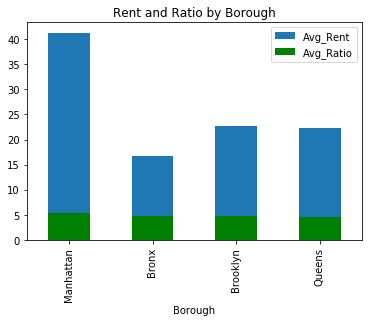

In [305]:
ax2 = avg_rent.plot(kind = 'bar', x = 'Borough', y = 'Avg_Rent')
ax3 = avg_rent.plot(kind = 'bar', x = 'Borough', y = 'Avg_Ratio', color = 'Green',ax = ax2)
ax2.set_title('Rent and Ratio by Borough')

It is expected that the cluster of Manhattan would be made all by Manhattan, but not only by it. Perhaps the criteria demanded by C was biased, but it matters that the closest from Manhattan was some Neighborhoods of Bronx, Brooklyn and Queens.

My recommendation for C is definately stay in Manhantan. Pick a neighborhood far from your actual clinic and give preferences for properties of Cluster 2. It is important to bold that Manhattan is usually way more expensive than other. So if some frontier neighborhood of Manhantan was interesting, I would recommend try some frontier neighborhood in other Borough.


# Conclusion

Of course a lot can be done further... it all depends on costs restrictions, maybe also add SqFt requirements of C, or even maximize distance between actual clinics to the new one, et coetera... but everything needs an end. 

The Course of IBM Data Science is awesome! Thank you all!

That's all folks.

<img src ="thatsall.jpg" width= "400" align="center"/>

